# Ejercicio 3 kmeans

Realizar estudios exploratorios de los datos usando análisis cluster y empleando el algoritmo de K-means o K-medias. Para ello habrá que:
- Procesar los datos. En esta etapa se seleccionarán las variables que sean relevantes, detectará los outliers y observaciones relevantes.

- Análisis cluster. Se determinará cuántos grupos significativos se pueden encontrar en los datos y se calcularán.

- Realiza una descripción semántica de los patrones encontrados, analizando la importancia de cada grupo y analizando la importancia de las variables en su definición, para ello hay que realizar una descripción estadística de los grupos encontrados.

**Segmentación de jugadores - Enunciado:**

https://www.kaggle.com/datasets/aishahakami/call-of-duty-players. Este dataset contiene datos sobre el comportamiento de una serie de jugadores de Call of Duty. Por ejemplo, número de victorias, nivel del jugador, derrotas, prestigio, hits, etc. El objetivo es categorizar a esos jugadores (separarlos en grupos o clusters) según esos datos.

## Importación de las librerías necesarias

In [13]:
from google.colab import drive
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Procesamiento y elección de variables para el estudio

Importo el dataset

In [14]:
drive.mount("/content/drive")

df_cod_players = pd.read_csv('/content/drive/MyDrive/IABD/SAA/datasets/Tema 3/cod.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Muestro las primeras y última filas del dataset.

In [15]:
df_cod_players

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


### Análisis estadístico.

Estudiamos los tipos de datos que tienen los atributos del dataset.

Solamanete la variable name es categórica nominal que contiene el nombre del jugador. El resto de características son de tipo numérico y ninguna de las características tiene un valor nulo.

In [16]:
df_cod_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [17]:
df_cod_players.drop("name", axis=1).describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


#### Mapa de calor

<Axes: >

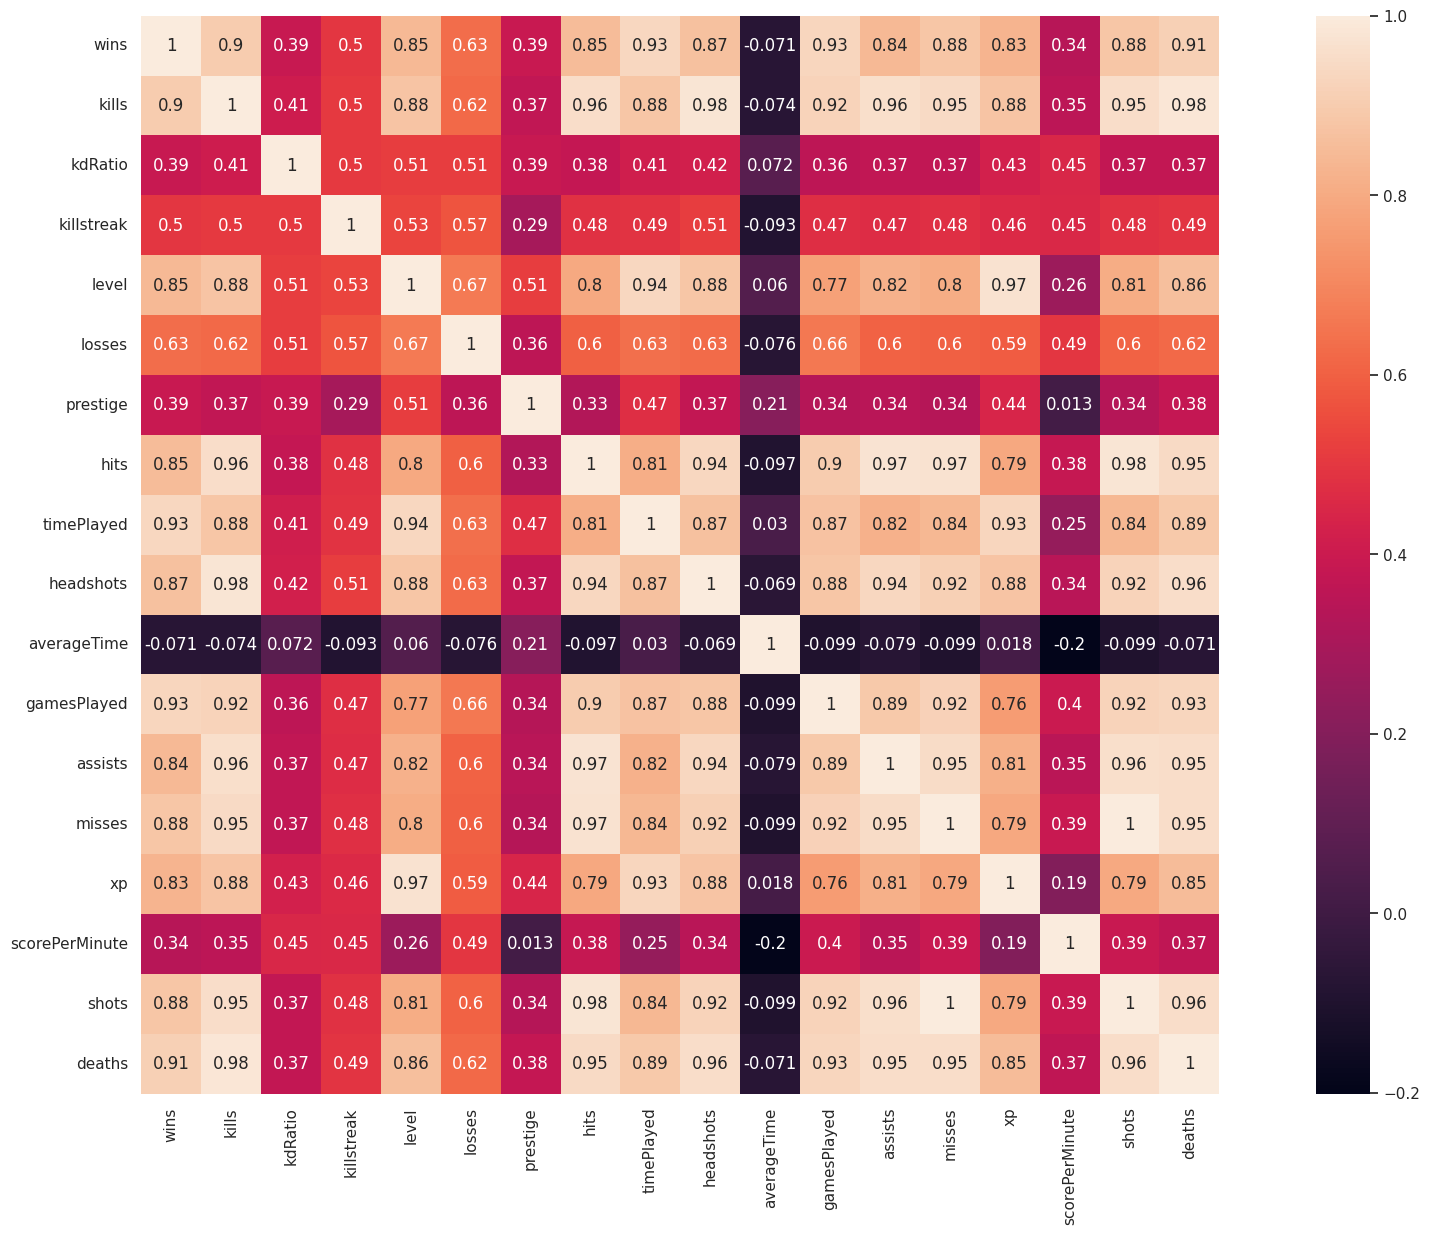

In [18]:
sns.set(rc={"figure.figsize": (25, 14)})
sns.heatmap(df_cod_players.drop("name", axis=1).corr(), square = True, annot = True)

### Argumentación de las variables elegidas

Las variables elegidas son:
- kdRatio
- killstreak
- scorePerMinute
- level
- timePlayed
- headshots
- wins
- losses
- prestige

Si nos fijamos en estas características tiene un valor bastante bueno que se encuentra entre 0.85 y 0.3.

El resto de características tienen un valor bastante elevado entre ambas lo que nos indica que los datos pueden ser redundantes y solo servirnos una de ellas. Esto podemos explicarlo con las siguientes características:
- wins --> esta característica tiene una fuerte relación con shots, kills, assists, deaths, misses, hits. Si le sacamos una lógica entre cada una de ellas (podríamos pensar que cuantas más muertes más wins), podriamos pensar que se deberían de poner para entrenar el modelo pero al tener esa relación tan alta estaríamos al final introduciendo información redundante.
- timePlayed --> gamesPlayed: Ocurriría lo mismo.
- level --> xp: Ocurriría lo mismo.
- averageTime: Esta característica no se ha elegido porque no tiene una relación lo suficientemente buena con alguna característica.

## Escalamiento y detección de outliers

El escalamiento de las variables se debe realizar porque para el entrenamiento las variables deben estar escaladas y el modelo no le de más importancia a unos datos que a otros. Ademas se tiene que transformar la variables categóricas.

### Transformación variables categóricas

En este dataset no existe ninguna variable categórica, ya que, la variable "name" no interesa para el enternamiento porque no aporta nada.

Vamos a buscar los outliers.

In [19]:
# lo primero de todo es quedarnos con las características que nos interesan
df_cod_players = df_cod_players[["kdRatio", "killstreak", "scorePerMinute", "level", "timePlayed", "headshots", "wins", "losses", "prestige"]]
N = df_cod_players.shape[0]

k = 4

SSE = []


for i in range(0, N):
  X_sin_i = np.delete(df_cod_players, i, axis=0)

  kmeans = KMeans(n_clusters=k, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)


sigma = np.std(SSE)
mu = np.mean(SSE)

umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)

df_sin_outliers = pd.DataFrame(np.delete(df_cod_players, outliers, axis=0), columns=df_cod_players.columns)
df_sin_outliers

,kdRatio,killstreak,scorePerMinute,level,timePlayed,headshots,wins,losses,prestige
0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,1.0,7.0,0.0,0.0,0.0,110.0
2,1.031250,0.0,0.0,9.0,32.0,16.0,0.0,0.0,110.0
3,0.400000,0.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0
4,0.200000,0.0,0.0,1.0,5.0,1.0,0.0,0.0,110.0
...,...,...,...,...,...,...,...,...,...
1533,0.432203,0.0,0.0,10.0,71.0,11.0,0.0,0.0,110.0
1534,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1535,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1536,0.000000,0.0,91.2,1.0,1.0,0.0,0.0,0.0,0.0


Una vez que tenemos ya los outliers eliminados, vamos a escalar los datos.

In [20]:
scaler = preprocessing.MinMaxScaler()

df_sin_outliers = pd.DataFrame(scaler.fit_transform(df_sin_outliers), columns = df_sin_outliers.columns)
df_sin_outliers

,kdRatio,killstreak,scorePerMinute,level,timePlayed,headshots,wins,losses,prestige
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.001740,0.000000,0.000000,0.0000,0.940171
2,0.343750,0.000000,0.000000,0.02168,0.007956,0.002046,0.000000,0.0000,0.940171
3,0.133333,0.000000,0.000000,0.00000,0.000746,0.000000,0.001598,0.0000,0.000000
4,0.066667,0.000000,0.000000,0.00000,0.001243,0.000128,0.000000,0.0000,0.940171
...,...,...,...,...,...,...,...,...,...
1533,0.144068,0.000000,0.000000,0.02439,0.017653,0.001407,0.000000,0.0000,0.940171
1534,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
1535,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000,0.000000
1536,0.000000,0.000000,0.220396,0.00000,0.000249,0.000000,0.000000,0.0000,0.000000


## Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de dicho algoritmo genere la misma solución.

In [21]:
k = 4


previous_centers = None
stable_n_init = None

for n_init in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
    kmeans.fit(df_sin_outliers)
    current_centers = np.sort(kmeans.cluster_centers_, axis=0)

    if previous_centers is not None:
        if np.allclose(previous_centers, current_centers, atol=1e-4):
            stable_n_init = n_init
            break

    previous_centers = current_centers

print(f"El número mínimo de n_init que genera soluciones consistentes es: {stable_n_init}")

El número mínimo de n_init que genera soluciones consistentes es: 2


## Determinar el valor de k (número de grupos)

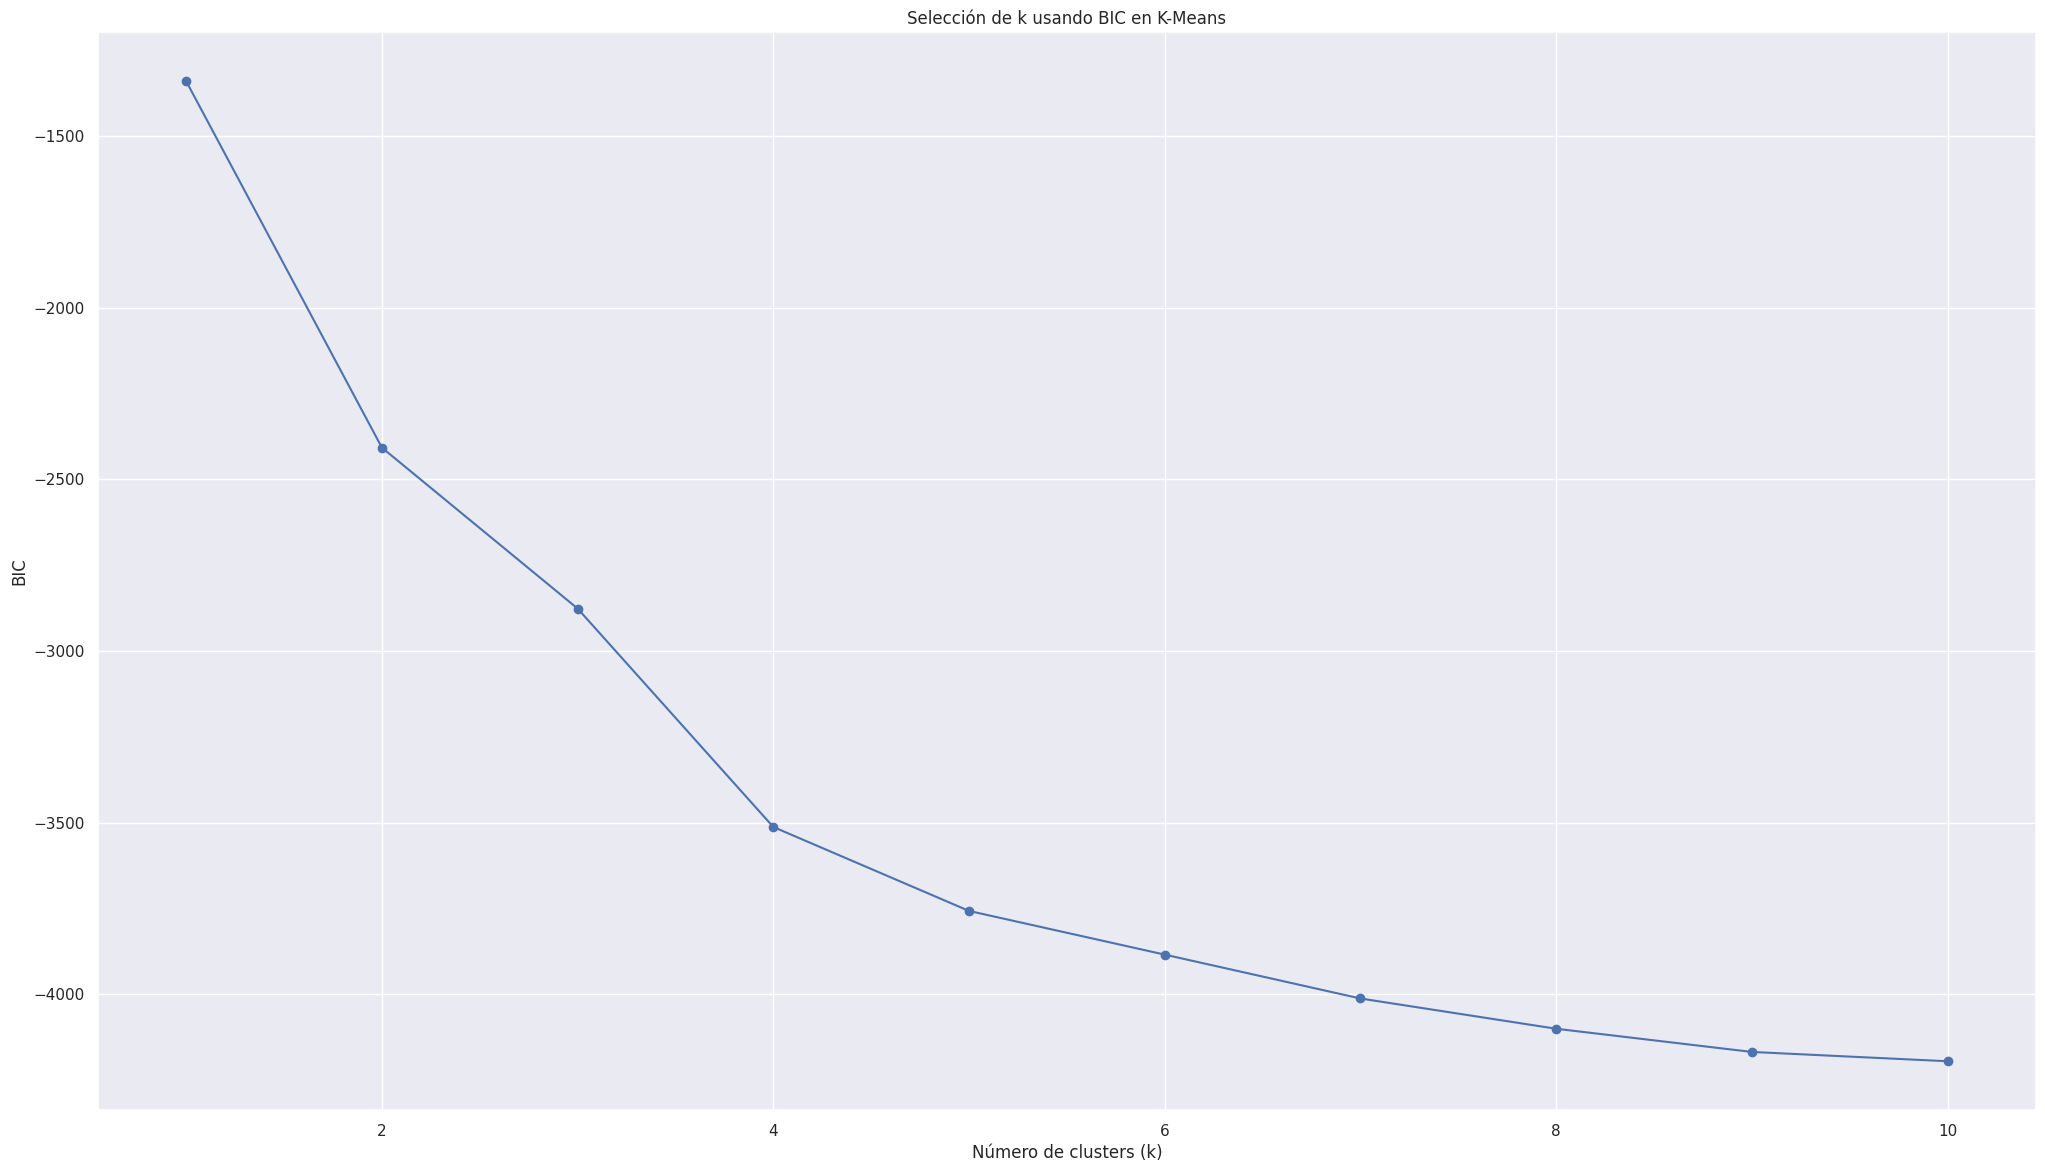

El número óptimo de clusters según BIC es: 10


In [22]:
def bic_kmeans(X, max_k=10):
    n, d = X.shape
    bics = []
    k_values = range(1, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        SSE = kmeans.inertia_

        p = k * (d + 1)

        # Calculo el BIC
        bic = n * np.log(SSE / n) + p * np.log(n)
        bics.append(bic)

    return k_values, bics


k_values, bics = bic_kmeans(df_sin_outliers)

plt.plot(k_values, bics, marker='o', linestyle='-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("BIC")
plt.title("Selección de k usando BIC en K-Means")
plt.show()

best_k = k_values[np.argmin(bics)]
print(f"El número óptimo de clusters según BIC es: {best_k}")


## Ejecución de análisis con los datos calculados (k y n_init)

El número mínimo de n_init que genera soluciones consistentes para k = 10 es: 3


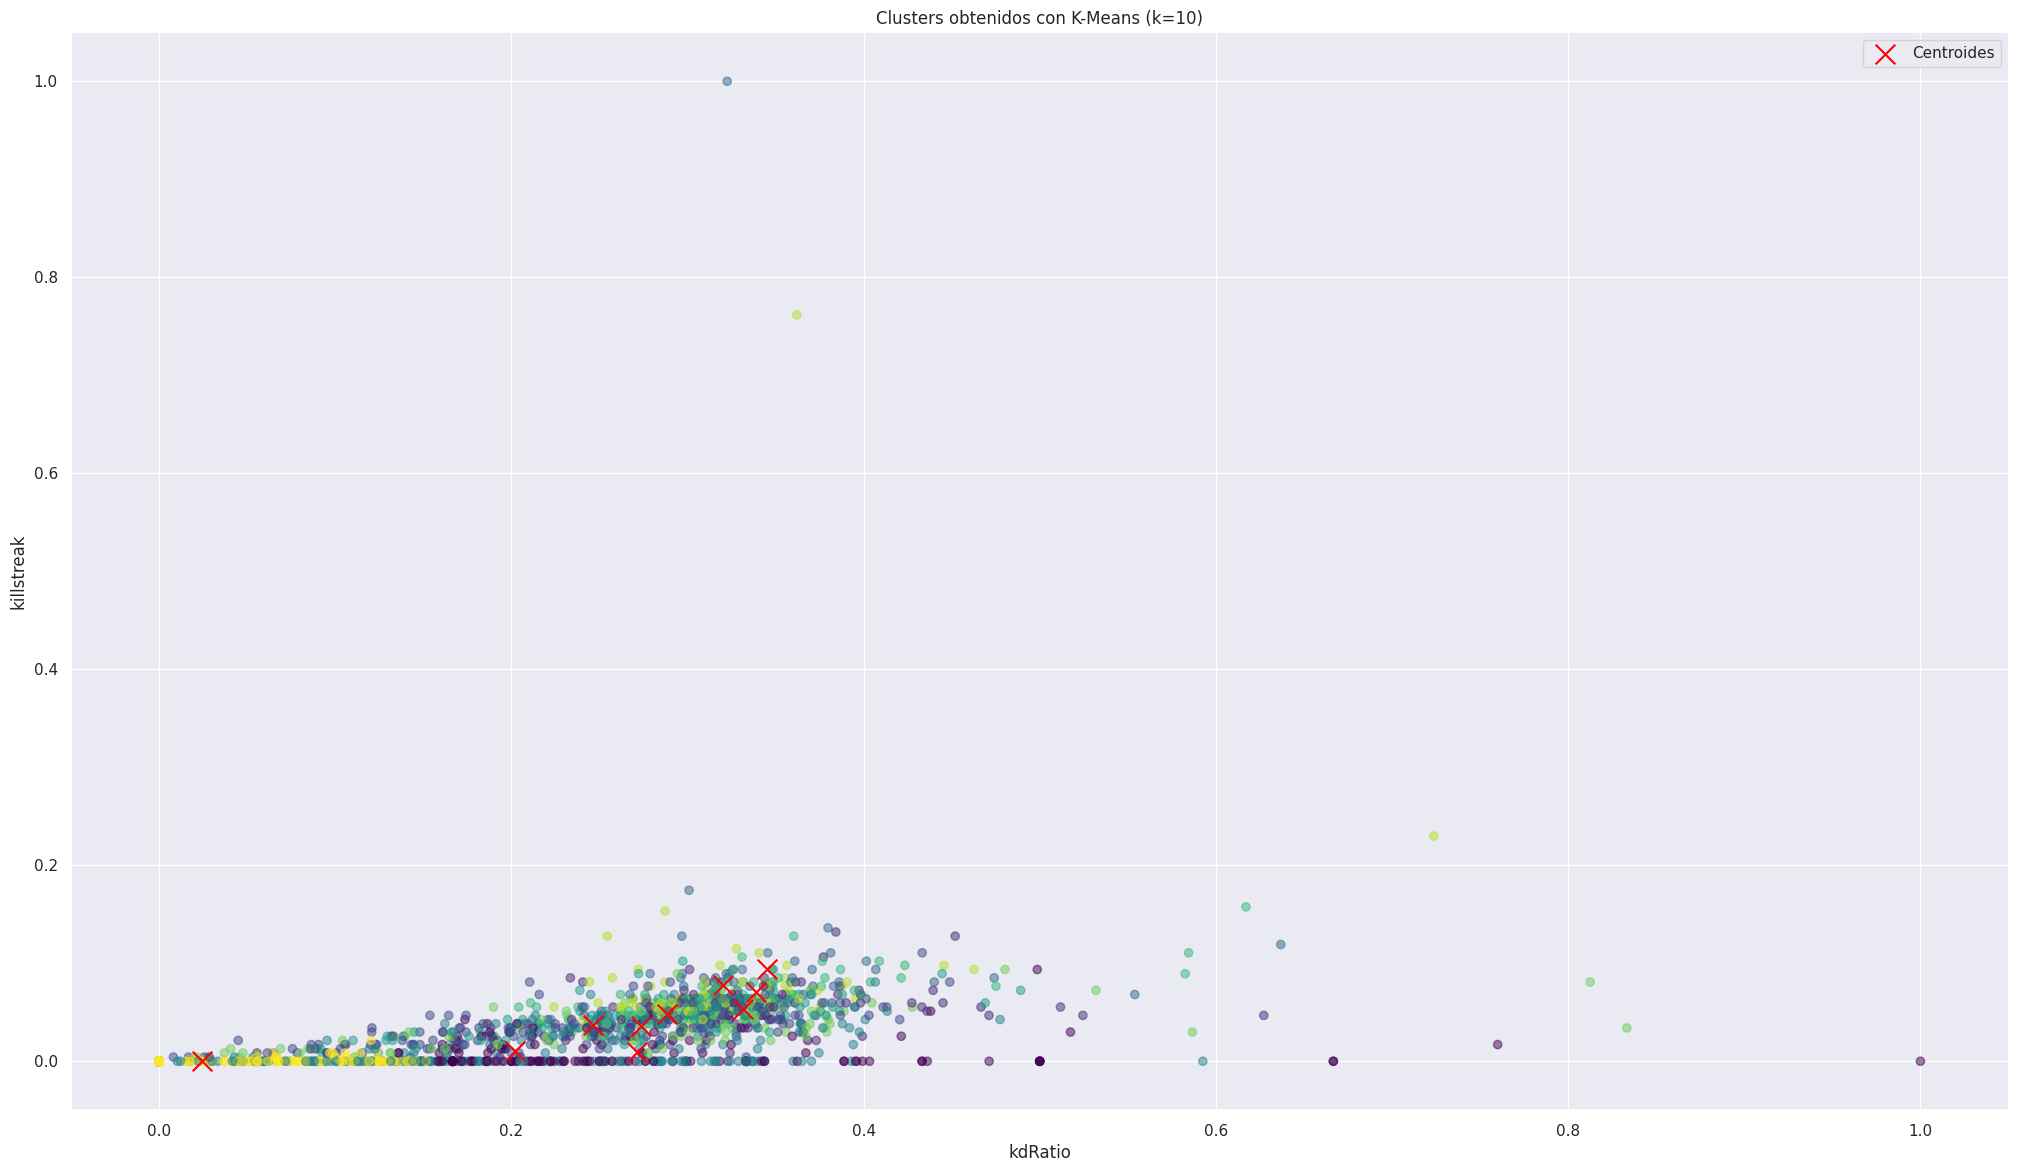

In [23]:
k = 10

previous_centers = None
stable_n_init = None

for n_init in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
    kmeans.fit(df_sin_outliers)
    current_centers = np.sort(kmeans.cluster_centers_, axis=0)

    if previous_centers is not None:
        if np.allclose(previous_centers, current_centers, atol=1e-4):
            stable_n_init = n_init
            break

    previous_centers = current_centers

print(f"El número mínimo de n_init que genera soluciones consistentes para k = {k} es: {stable_n_init}")

kmeans = KMeans(n_clusters=k, n_init=stable_n_init, random_state=1)
kmeans.fit(df_sin_outliers)

labels = kmeans.labels_


centroids = kmeans.cluster_centers_

plt.scatter(df_sin_outliers.iloc[:, 0], df_sin_outliers.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroides")
plt.xlabel(df_sin_outliers.columns[0])
plt.ylabel(df_sin_outliers.columns[1])
plt.title(f"Clusters obtenidos con K-Means (k={k})")
plt.legend()
plt.show()


## Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad de observaciones de ese grupo y el centroide que representa a ese grupo (valor de cada variable)

In [24]:
# Obtener etiquetas de los clusters
labels = kmeans.labels_

# Obtener los centroides
centroids = kmeans.cluster_centers_

data = []

k = 3

for i in range(k):
    cluster_data = df_sin_outliers[labels == i]

    count = len(cluster_data)

    centroid = centroids[i]

    data.append([i, count, *centroid])

df_cluster_info = pd.DataFrame(data, columns=['Número de grupo', 'Cantidad de observaciones', 'Centroide: kdRatio', 'Centroide: killstreak', 'Centroide: scorePerMinute', 'Centroide: level', 'Centroide: timePlayed', 'Centroide: headshots', 'Centroide: wins', 'Centroide: losses', 'Centroide: prestige'])

df_cluster_info

,Número de grupo,Cantidad de observaciones,Centroide: kdRatio,Centroide: killstreak,Centroide: scorePerMinute,Centroide: level,Centroide: timePlayed,Centroide: headshots,Centroide: wins,Centroide: losses,Centroide: prestige
0,0,154,0.271493,0.009505,0.037582,0.024091,0.013605,0.003779,0.013253,0.012013,0.052725
1,1,87,0.331555,0.053216,0.133375,0.425319,0.347491,0.159698,0.164318,0.101293,0.947736
2,2,219,0.246161,0.036841,0.689508,0.047481,0.031935,0.030232,0.032435,0.071632,0.056668


## Realizar una descripción semántica de los grupos

### Grupo 0

Presenta valores bajos en todas las métricas, lo que sugiere jugadores con poca experiencia (casuales o principiantes). Representa a 154 jugadores.
- kdRatio es de 0.27, indicando un desempeño bajo en combate.
- killstreak y scorePerMinute son mínimos, lo que indica que no consiguen muchas rachas de bajas ni puntúan rápido.
- level y prestige son muy bajos, lo que confirma que estos jugadores están en sus primeras partidas.
- timePlayed es escaso, lo que refuerza la idea de que son jugadores nuevos o poco comprometidos.

### Grupo 1

Tienen valores más altos que el grupo anterior, esto nos puede indicar que sean jugadores experimentados con alto compromiso, niveles altos y buen desempeño en combate. Representa un total de 87 jugadores.
- kdRatio de 0.33, mejor que el grupo 0 pero aún moderado.
- killstreak y scorePerMinute son considerablemente más altos, lo que indica mayor rendimiento en combate y puntuación rápida.
- level y prestige son significativamente altos, lo que sugiere jugadores veteranos.
- timePlayed es mucho mayor que en los otros grupos, indicando un alto compromiso con el juego.
- wins y headshots también son altos, reforzando la idea de que son jugadores experimentados.

### Grupo 2
Representa un total de 219 jugadores.
- kdRatio de 0.25, similar al grupo 0, lo que indica que no destacan por eliminar rivales.
- killstreak más alto que el grupo 0, pero menor que el grupo 1.
- scorePerMinute es muy elevado (0.69), lo que indica que priorizan la puntuación en lugar de los enfrentamientos directos.
- level y prestige son bajos en comparación con el grupo 1, lo que sugiere jugadores en etapa intermedia o con un estilo de juego diferente.
- timePlayed es mayor que el grupo 0 pero menor que el grupo 1, lo que sugiere un compromiso moderado con el juego.